## Module 1 – Descriptive Statistics and Distributions

### Part A – Central Tendency and Spread

1. Marks: 50, 60, 65, 70, 75, 80, 85, 90
- Find mean, median, mode.
- Replace 90 with 900 and recompute mean. Explain the effect of outliers.

In [ ]:
from typing import Counter
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib_venn import venn2
import matplotlib.patches as mpatches
import seaborn as sns

In [23]:
marks = [50, 60, 65, 70, 75, 80, 85, 90]

def calculate_central_tendency(data):
  mean = np.mean(data)
  median = np.median(data)

  mode_data = Counter(data)
  max_count = max(mode_data.values())
  modes = [k for k, v in mode_data.items() if v == max_count]
  mode = modes if max_count > 1 else "No Mode"

  return mean, median, mode

mean1, median1, mode1 = calculate_central_tendency(marks)

print(f"Original Data: {marks}")
print(f"\nCentral Tendency Measures:")
print(f"  Mean:   {mean1:.4f}")
print(f"  Median: {median1:.4f}")
print(f"  Mode:   {mode1}")


marks_outlier = marks.copy()
marks_outlier[-1] = 900

mean2, median2, mode2 = calculate_central_tendency(marks_outlier)

print(f"\nAfter replacing 90 with 900:")
print(f"  New Mean:   {mean2:.4f}")
print(f"  New Median: {median2:.4f}")
print(f"  New Mode:   {mode2}")

print(f"\nEffect of Outlier:")
print(f"  Mean change:   {mean1:.2f} → {mean2:.2f} (Δ = {mean2-mean1:.2f}, {((mean2-mean1)/mean1)*100:.1f}% increase)")
print(f"  Median change: {median1:.2f} → {median2:.2f} (Δ = {median2-median1:.2f})")
print(f"  Mode change:   {mode1} → {mode2}")
print(f"\nThe mean is highly sensitive to outliers, while the median remains stable.")


Original Data: [50, 60, 65, 70, 75, 80, 85, 90]

Central Tendency Measures:
  Mean:   71.8750
  Median: 72.5000
  Mode:   No Mode

After replacing 90 with 900:
  New Mean:   173.1250
  New Median: 72.5000
  New Mode:   No Mode

Effect of Outlier:
  Mean change:   71.88 → 173.12 (Δ = 101.25, 140.9% increase)
  Median change: 72.50 → 72.50 (Δ = 0.00)
  Mode change:   No Mode → No Mode

The mean is highly sensitive to outliers, while the median remains stable.


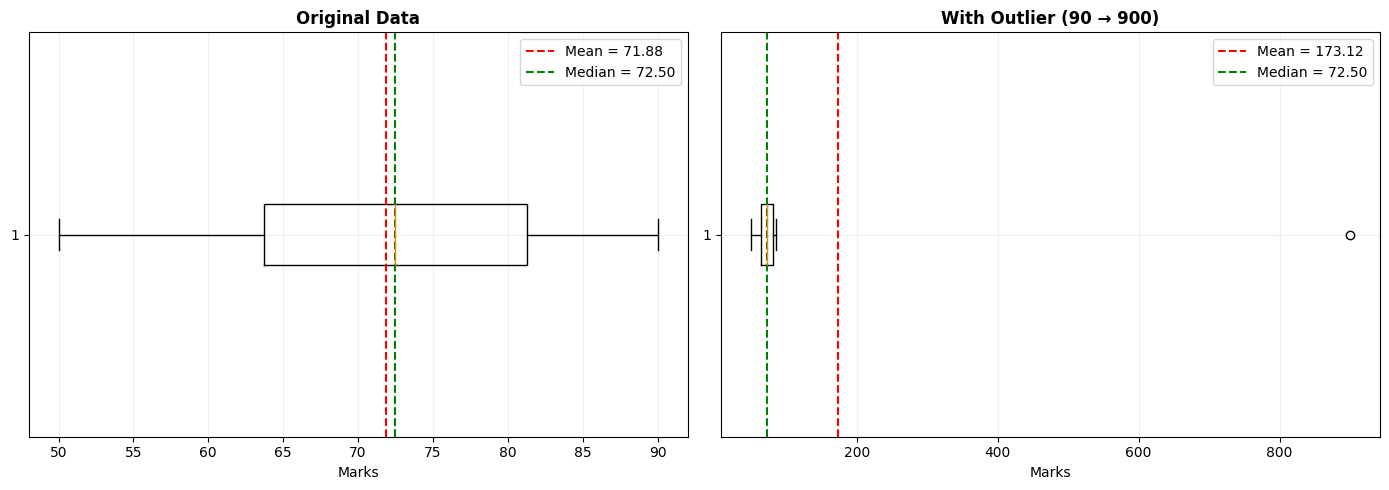

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(marks, vert=False)
axes[0].axvline(mean1, color='red', linestyle='--', label=f'Mean = {mean1:.2f}')
axes[0].axvline(median1, color='green', linestyle='--', label=f'Median = {median1:.2f}')

axes[0].set_title('Original Data', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Marks')
axes[0].legend()
axes[0].grid(True, alpha=0.2)

axes[1].boxplot(marks_outlier, vert=False)
axes[1].axvline(mean2, color='red', linestyle='--', label=f'Mean = {mean2:.2f}')
axes[1].axvline(median2, color='green', linestyle='--', label=f'Median = {median2:.2f}')

axes[1].set_title('With Outlier (90 → 900)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Marks')
axes[1].legend()
axes[1].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

2. Temperatures (°C): 29, 31, 33, 33, 32, 31, 30
- Calculate variance and standard deviation.
- Which measure is easier to interpret and why?


In [ ]:
temperatures = np.array([29, 31, 33, 33, 32, 31, 30])

mean_temp = np.mean(temperatures)
variance = np.var(temperatures, ddof=0)
std_dev = np.std(temperatures, ddof=0)

print(f"Data: {temperatures}°C")
print(f"\nMeasures of Spread:")
print(f"  Mean: {mean_temp:.4f}°C")
print(f"  Variance (σ²):  {variance:.4f}°C²")
print(f"  Standard Dev (σ): {std_dev:.4f}°C")

print(f"\nStandard deviation is easier to interpret:")
print(f"  Same units as data (°C not °C²)")
print(f"  Can say: 'Temperatures vary by ±{std_dev:.2f}°C from mean'")

Data: [29 31 33 33 32 31 30]°C

Measures of Spread:
  Mean: 31.2857°C
  Variance (σ²):  1.9184°C²
  Standard Dev (σ): 1.3851°C

Standard deviation is easier to interpret:
  Same units as data (°C not °C²)
  Can say: 'Temperatures vary by ±1.39°C from mean'


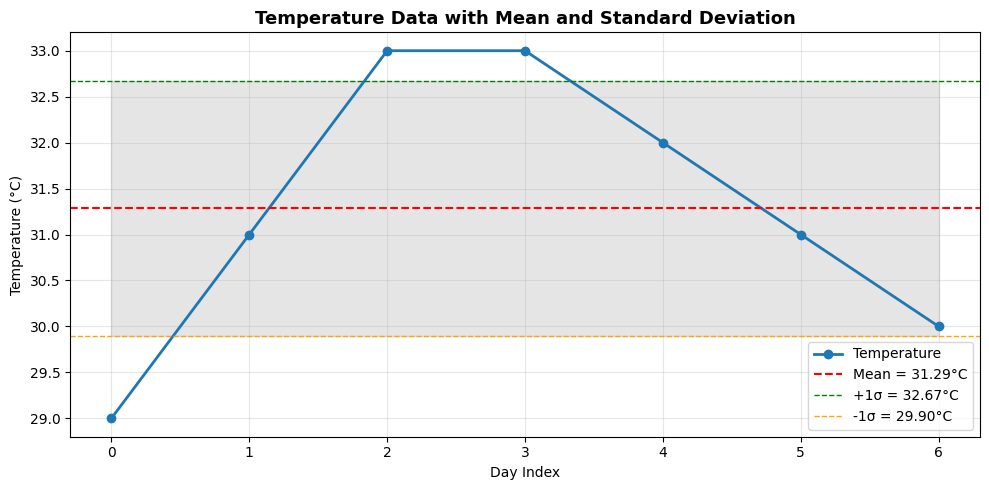

In [26]:
plt.figure(figsize=(10, 5))

# Plot the temperature data
plt.plot(temperatures, marker='o', linewidth=2, label='Temperature')

# Plot mean line
plt.axhline(mean_temp, color='red', linestyle='--', linewidth=1.5, label=f'Mean = {mean_temp:.2f}°C')

# Plot ±1 standard deviation lines
plt.axhline(mean_temp + std_dev, color='green', linestyle='--', linewidth=1, label=f'+1σ = {mean_temp + std_dev:.2f}°C')
plt.axhline(mean_temp - std_dev, color='orange', linestyle='--', linewidth=1, label=f'-1σ = {mean_temp - std_dev:.2f}°C')

# Add shaded area for ±1 standard deviation
plt.fill_between(range(len(temperatures)), mean_temp - std_dev, mean_temp + std_dev, color='gray', alpha=0.2)

# Customize plot
plt.title('Temperature Data with Mean and Standard Deviation', fontsize=13, fontweight='bold')
plt.xlabel('Day Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Part B – Percentiles, IQR and Z-Score

3. Cat weights (kg): 2.5, 3.0, 3.2, 3.3, 3.4, 3.5, 3.6, 3.9, 4.0, 4.5
- Find P25, P50, P75 and IQR. Mark possible outliers.


In [27]:
cat_weights = np.array([2.5, 3.0, 3.2, 3.3, 3.4, 3.5, 3.6, 3.9, 4.0, 4.5])

P25 = np.percentile(cat_weights, 25)
P50 = np.percentile(cat_weights, 50)
P75 = np.percentile(cat_weights, 75)
IQR = P75 - P25

lower_fence = P25 - 1.5 * IQR
upper_fence = P75 + 1.5 * IQR

outliers = cat_weights[(cat_weights < lower_fence) | (cat_weights > upper_fence)]

print(f"Data: {cat_weights} kg")
print(f"\nPercentiles:")
print(f"  P25 (Q1): {P25:.4f} kg")
print(f"  P50 (Q2): {P50:.4f} kg")
print(f"  P75 (Q3): {P75:.4f} kg")
print(f"  IQR:  {IQR:.4f} kg")

print(f"\nOutlier Detection:")
print(f"  Lower Fence: {lower_fence:.4f} kg")
print(f"  Upper Fence: {upper_fence:.4f} kg")

if len(outliers) > 0:
    print(f"\nOutliers detected: {outliers}")
else:
    print(f"\nNo outliers detected")

Data: [2.5 3.  3.2 3.3 3.4 3.5 3.6 3.9 4.  4.5] kg

Percentiles:
  P25 (Q1): 3.2250 kg
  P50 (Q2): 3.4500 kg
  P75 (Q3): 3.8250 kg
  IQR:  0.6000 kg

Outlier Detection:
  Lower Fence: 2.3250 kg
  Upper Fence: 4.7250 kg

No outliers detected


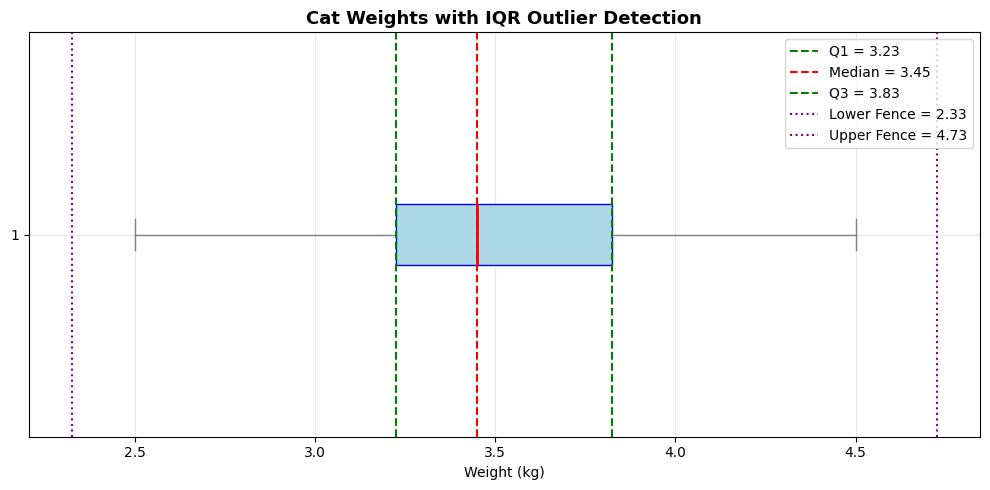

In [28]:
plt.figure(figsize=(10, 5))
plt.boxplot(cat_weights, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'),
            flierprops=dict(marker='o', color='orange', markersize=8))

# Annotate key points
plt.axvline(P25, color='green', linestyle='--', label=f'Q1 = {P25:.2f}')
plt.axvline(P50, color='red', linestyle='--', label=f'Median = {P50:.2f}')
plt.axvline(P75, color='green', linestyle='--', label=f'Q3 = {P75:.2f}')
plt.axvline(lower_fence, color='purple', linestyle=':', label=f'Lower Fence = {lower_fence:.2f}')
plt.axvline(upper_fence, color='purple', linestyle=':', label=f'Upper Fence = {upper_fence:.2f}')

plt.title('Cat Weights with IQR Outlier Detection', fontsize=13, fontweight='bold')
plt.xlabel('Weight (kg)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

4. Given μ = 50, σ = 10
- Find Z for x = 65 and interpret.
- For Z = −2.5, find x.


In [29]:
mu = 50
sigma = 10

# Part a: Z for x = 65
x1 = 65
z1 = (x1 - mu) / sigma

# Part b: x for Z = -2.5
z2 = -2.5
x2 = mu + z2 * sigma

print(f"Given: μ = {mu}, σ = {sigma}")
print(f"\nZ-score for x = {x1}")
print(f"  Z = ({x1} - {mu}) / {sigma} = {z1:.2f}")
print(f"  Value is {abs(z1):.1f} std devs ABOVE mean")

print(f"\nFind x for Z = {z2}")
print(f"  x = {mu} + ({z2}) × {sigma} = {x2:.0f}")
print(f"  Value is {abs(z2):.1f} std devs BELOW mean")


Given: μ = 50, σ = 10

Z-score for x = 65
  Z = (65 - 50) / 10 = 1.50
  Value is 1.5 std devs ABOVE mean

Find x for Z = -2.5
  x = 50 + (-2.5) × 10 = 25
  Value is 2.5 std devs BELOW mean


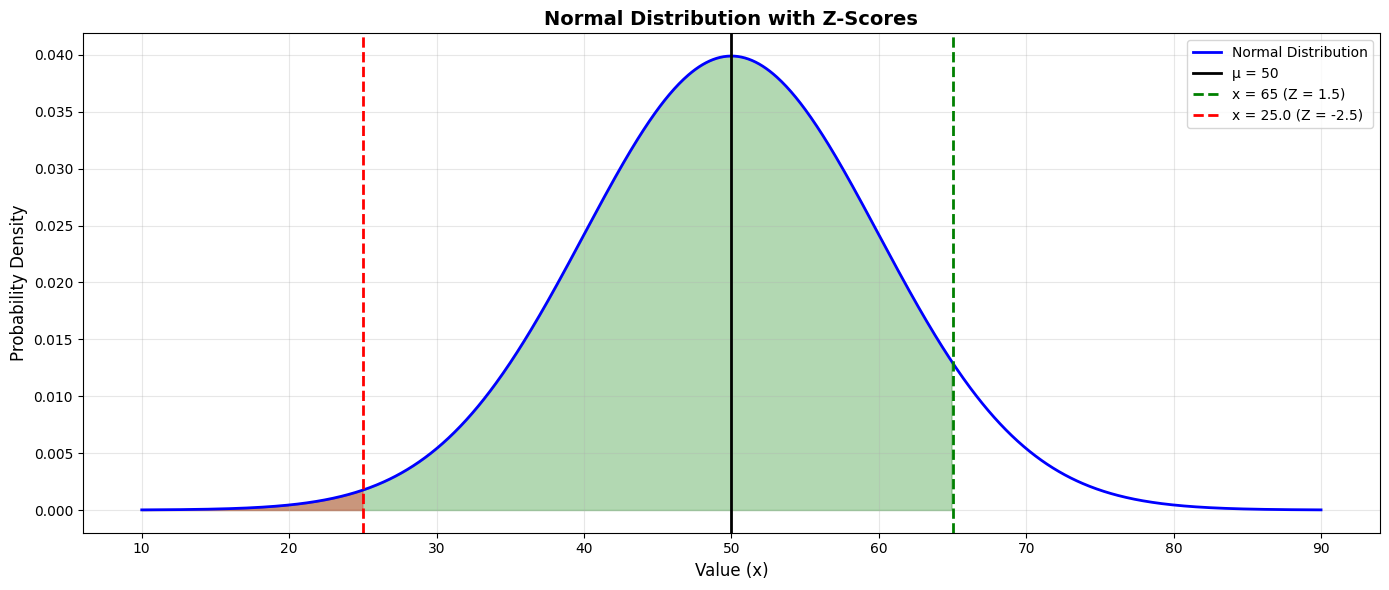

In [30]:
# Generate a range of x values around the mean (±4σ)
x_range = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Compute the probability density function (PDF) for each x
y = stats.norm.pdf(x_range, mu, sigma)

# Create the plot
plt.figure(figsize=(14, 6))

# Plot the bell curve (normal distribution)
plt.plot(x_range, y, 'b-', linewidth=2, label='Normal Distribution')

# Draw a vertical line for the mean (μ)
plt.axvline(mu, color='black', linestyle='-', linewidth=2, label=f'μ = {mu}')

# Draw vertical lines for the specific x values and label their Z-scores
plt.axvline(x1, color='green', linestyle='--', linewidth=2, label=f'x = {x1} (Z = {z1:.1f})')
plt.axvline(x2, color='red', linestyle='--', linewidth=2, label=f'x = {x2} (Z = {z2:.1f})')

# Fill the area under the curve up to each x value (to visualize cumulative probability)
plt.fill_between(x_range, y, where=(x_range <= x1), alpha=0.3, color='green')
plt.fill_between(x_range, y, where=(x_range <= x2), alpha=0.3, color='red')

# Label the axes
plt.xlabel('Value (x)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

# Add a title and legend
plt.title('Normal Distribution with Z-Scores', fontsize=14, fontweight='bold')
plt.legend()

# Add a light grid for readability
plt.grid(True, alpha=0.3)

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

## Module 2 – Probability Basics for ML


### Part A – Basic Probability

1. In a survey of 100 people:
- 40 like pizza (A)
- 50 like burgers (B)
- 20 like both (A ∩ B)
 - Find P(A), P(B), P(A ∩ B), and P(A | B).


In [31]:
total = 100

like_pizza = 40      # people who like pizza (Event A)
like_burgers = 50    # people who like burgers (Event B)
like_both = 20       # people who like both pizza and burgers (A ∩ B)

# P(A): Probability of liking pizza
P_A = like_pizza / total

# P(B): Probability of liking burgers
P_B = like_burgers / total

# P(A ∩ B): Probability of liking both pizza and burgers
P_A_and_B = like_both / total

# P(A | B): Conditional probability — probability of liking pizza given that a person likes burgers
# Formula: P(A | B) = P(A ∩ B) / P(B)
P_A_given_B = like_both / like_burgers

print(f"Total: {total}, Pizza: {like_pizza}, Burgers: {like_burgers}, Both: {like_both}")

print(f"\nProbabilities:")
print(f"  P(A) = {P_A:.3f} ({P_A*100:.0f}%)")           # Probability of liking pizza
print(f"  P(B) = {P_B:.3f} ({P_B*100:.0f}%)")           # Probability of liking burgers
print(f"  P(A ∩ B) = {P_A_and_B:.3f} ({P_A_and_B*100:.0f}%)")  # Probability of liking both
print(f"  P(A | B) = {P_A_given_B:.3f} ({P_A_given_B*100:.0f}%)") # Conditional probability

# --- Interpretation ---
print(f"\nAmong burgers lover, {P_A_given_B*100:.0f}% also like pizza")


Total: 100, Pizza: 40, Burgers: 50, Both: 20

Probabilities:
  P(A) = 0.400 (40%)
  P(B) = 0.500 (50%)
  P(A ∩ B) = 0.200 (20%)
  P(A | B) = 0.400 (40%)

Among burgers lover, 40% also like pizza


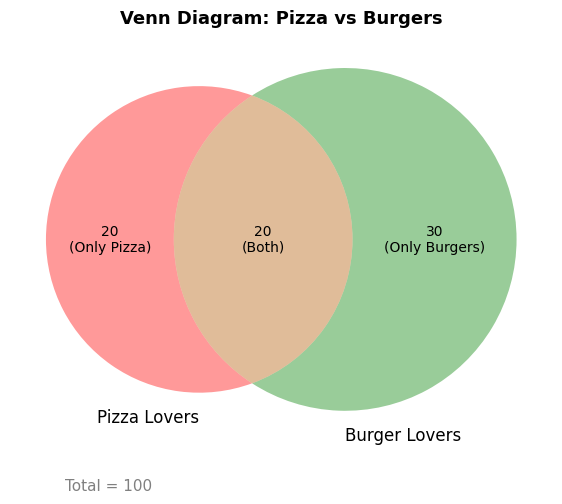

In [32]:
plt.figure(figsize=(7, 6))

# Create a Venn diagram
venn = venn2(subsets=(like_pizza - like_both,  # Only pizza
                      like_burgers - like_both,  # Only burgers
                      like_both),                # Both
             set_labels=('Pizza Lovers', 'Burger Lovers'))

# Customize colors and titles
venn.get_label_by_id('10').set_text(f'{like_pizza - like_both}\n(Only Pizza)')
venn.get_label_by_id('01').set_text(f'{like_burgers - like_both}\n(Only Burgers)')
venn.get_label_by_id('11').set_text(f'{like_both}\n(Both)')

plt.title('Venn Diagram: Pizza vs Burgers', fontsize=13, fontweight='bold')
plt.text(-0.6, -0.7, f'Total = {total}', fontsize=11, color='gray')
plt.show()


### Part B – Conditional Probability and Bayes

2. Email dataset of 1000 mails:
- 100 spam (S)
- 40 of these contain “free” (F)
- 60 non-spam also contain “free”
 - Compute P(S | F) using Bayes’ Theorem →

 Explain what this means for a spam filter.

In [33]:
total_emails = 1000      # total emails
spam_emails = 100        # number of spam emails
non_spam_emails = 900    # number of non-spam emails
spam_with_free = 40      # spam emails containing the word "free"
non_spam_with_free = 60  # non-spam emails containing the word "free"

# --- Step 1: Basic probabilities ---
P_S = spam_emails / total_emails        # Probability an email is spam
P_not_S = non_spam_emails / total_emails # Probability an email is not spam

# Conditional probabilities
P_F_given_S = spam_with_free / spam_emails       # Probability email contains "free" given spam
P_F_given_not_S = non_spam_with_free / non_spam_emails  # Probability email contains "free" given not spam

# --- Step 2: Total probability of "free" in any email ---
# P(F) = P(F|S)P(S) + P(F|¬S)P(¬S)
P_F = P_F_given_S * P_S + P_F_given_not_S * P_not_S

# --- Step 3: Bayes' Theorem ---
# P(S|F) = P(F|S) * P(S) / P(F)
P_S_given_F = (P_F_given_S * P_S) / P_F

# --- Step 4: Print Results ---
print(f"Total emails: {total_emails}, Spam: {spam_emails}, Non-spam: {non_spam_emails}")
print(f"\nBayes' Theorem Calculation:")
print(f"  P(S) = {P_S:.3f}")                  # Prior probability of spam
print(f"  P(F|S) = {P_F_given_S:.3f}")       # Likelihood: free given spam
print(f"  P(F|¬S) = {P_F_given_not_S:.4f}") # Likelihood: free given non-spam
print(f"  P(F) = {P_F:.4f}")                 # Total probability of "free"
print(f"  P(S|F) = {P_S_given_F:.4f} ({P_S_given_F*100:.1f}%)")  # Posterior probability

# --- Step 5: Interpretation ---
print(f"\nWhen email contains 'free', {P_S_given_F*100:.0f}% chance it's spam")
print(f"   (But {(1-P_S_given_F)*100:.0f}% of 'free' emails are legitimate!)")

Total emails: 1000, Spam: 100, Non-spam: 900

Bayes' Theorem Calculation:
  P(S) = 0.100
  P(F|S) = 0.400
  P(F|¬S) = 0.0667
  P(F) = 0.1000
  P(S|F) = 0.4000 (40.0%)

When email contains 'free', 40% chance it's spam
   (But 60% of 'free' emails are legitimate!)


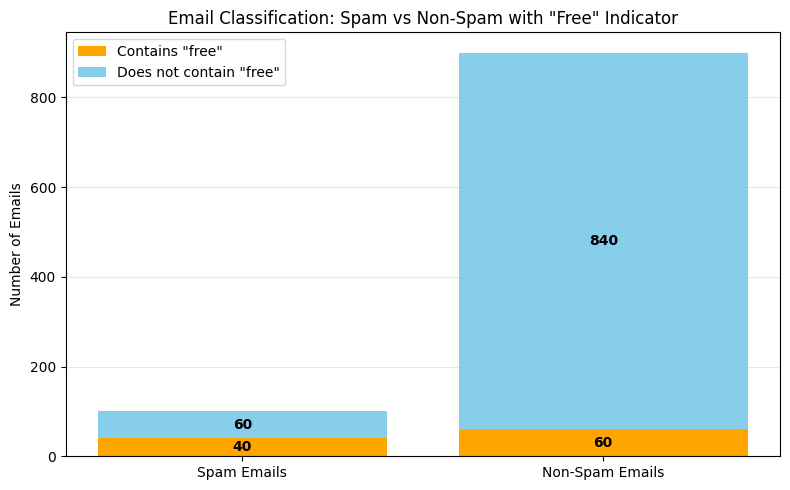

In [34]:
labels = ['Spam Emails', 'Non-Spam Emails']
contain_free = [spam_with_free, non_spam_with_free]
no_free = [spam_emails - spam_with_free, non_spam_emails - non_spam_with_free]

x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, contain_free, color='orange', label='Contains "free"')
plt.bar(x, no_free, bottom=contain_free, color='skyblue', label='Does not contain "free"')

plt.xticks(x, labels)
plt.ylabel('Number of Emails')
plt.title('Email Classification: Spam vs Non-Spam with "Free" Indicator')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Annotate the bars
for i in range(len(labels)):
    plt.text(i, contain_free[i]/2, str(contain_free[i]), ha='center', va='center', color='black', fontweight='bold')
    plt.text(i, contain_free[i] + no_free[i]/2, str(no_free[i]), ha='center', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

3. Disease example:
- P(Disease) = 1 / 10000
- P(+ | D) = 0.99
- P(− | ¬D) = 0.99

Find P(D | +) and discuss the base-rate effect.

In [35]:
P_D = 1 / 10000           # Probability of having the disease (1 in 10,000 people)
P_pos_given_D = 0.99      # Sensitivity: Probability test is positive given person has disease
P_neg_given_not_D = 0.99  # Specificity: Probability test is negative given person is healthy
P_pos_given_not_D = 1 - P_neg_given_not_D  # Probability test is positive even though healthy (false positive)
P_not_D = 1 - P_D         # Probability of NOT having the disease

# ---------------------------------------------
# Apply Bayes' Theorem
# ---------------------------------------------
# Total probability of testing positive
P_pos = P_pos_given_D * P_D + P_pos_given_not_D * P_not_D

# Posterior: Probability of having the disease given positive result
P_D_given_pos = (P_pos_given_D * P_D) / P_pos

# ---------------------------------------------
# Display results
# ---------------------------------------------
print(f"Disease prevalence: {P_D:.6f} (1 in 10,000)")
print(f"Test: 99% sensitive, 99% specific")
print(f"\nBayes' Calculation:")
print(f"  P(+) = {P_pos:.6f}")
print(f"  P(D|+) = {P_D_given_pos:.6f} ({P_D_given_pos*100:.2f}%)")

print(f"\nBASE RATE EFFECT:")
print(f"Despite 99% accuracy, positive test only means ~{P_D_given_pos*100:.1f}% chance of disease!")
print(f"\nWhy? In 10,000 people:")
print(f"  - Only 1 has disease → 1 true positive")
print(f"  - 9,999 healthy → ~100 false positives (1% of 9,999)")
print(f"  - Result: 1 true vs 100 false positives!")


Disease prevalence: 0.000100 (1 in 10,000)
Test: 99% sensitive, 99% specific

Bayes' Calculation:
  P(+) = 0.010098
  P(D|+) = 0.009804 (0.98%)

BASE RATE EFFECT:
Despite 99% accuracy, positive test only means ~1.0% chance of disease!

Why? In 10,000 people:
  - Only 1 has disease → 1 true positive
  - 9,999 healthy → ~100 false positives (1% of 9,999)
  - Result: 1 true vs 100 false positives!


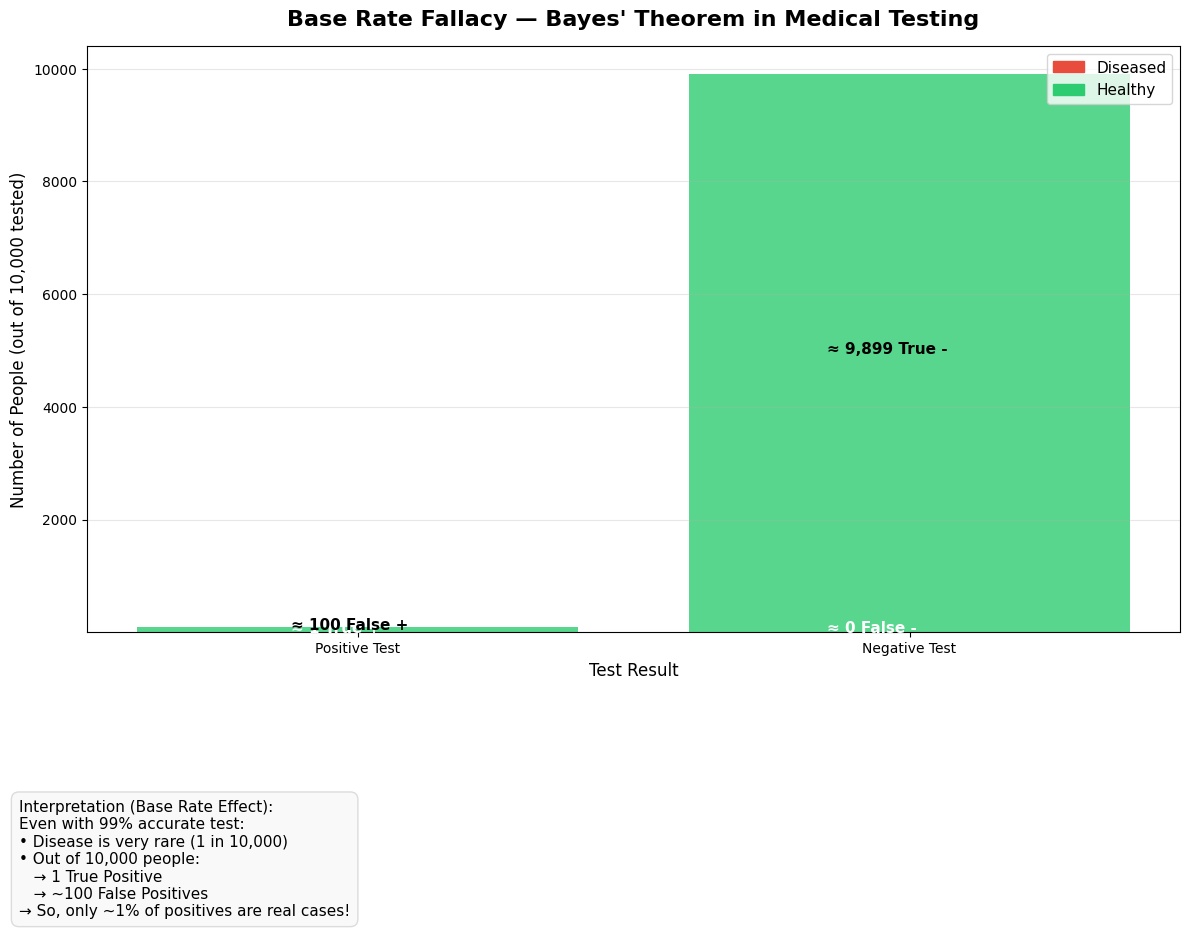

In [36]:
# Simulating 10,000 people
total_population = 10000
true_disease = 1                # People who truly have the disease
false_disease = total_population - true_disease

# Test outcomes
true_positive = 0.99 * true_disease        # Test correctly says positive
false_positive = 0.01 * false_disease      # Test incorrectly says positive
true_negative = 0.99 * false_disease       # Test correctly says negative
false_negative = 0.01 * true_disease       # Test incorrectly says negative

# Data for visualization
categories = ['Positive Test', 'Negative Test']
disease_results = [true_positive, false_negative]
healthy_results = [false_positive, true_negative]

# ---------------------------------------------
# Plot stacked bar chart
# ---------------------------------------------
plt.figure(figsize=(12, 7))

# Bars
plt.bar(categories, disease_results, color='#e74c3c', alpha=0.8, label='Diseased (True cases)')
plt.bar(categories, healthy_results, bottom=disease_results, color='#2ecc71', alpha=0.8, label='Healthy (False cases)')

# Titles and labels
plt.title("Base Rate Fallacy — Bayes' Theorem in Medical Testing", fontsize=16, fontweight='bold', pad=15)
plt.ylabel("Number of People (out of 10,000 tested)", fontsize=12)
plt.xlabel("Test Result", fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Custom legend
disease_patch = mpatches.Patch(color='#e74c3c', label='Diseased')
healthy_patch = mpatches.Patch(color='#2ecc71', label='Healthy')
plt.legend(handles=[disease_patch, healthy_patch], fontsize=11, loc='upper right')

# ---------------------------------------------
# Annotating bars for clarity
# ---------------------------------------------
plt.text(-0.12, true_positive / 2, "≈ 1 True +", color='white', fontweight='bold', fontsize=11)
plt.text(-0.12, true_positive + false_positive / 2, "≈ 100 False +", color='black', fontweight='bold', fontsize=11)

plt.text(0.85, false_negative / 2, "≈ 0 False -", color='white', fontweight='bold', fontsize=11)
plt.text(0.85, false_negative + true_negative / 2, "≈ 9,899 True -", color='black', fontweight='bold', fontsize=11)

# ---------------------------------------------
# Add a summary box explaining the insight
# ---------------------------------------------
textstr = (
    "Interpretation (Base Rate Effect):\n"
    "Even with 99% accurate test:\n"
    "• Disease is very rare (1 in 10,000)\n"
    "• Out of 10,000 people:\n"
    "   → 1 True Positive\n"
    "   → ~100 False Positives\n"
    "→ So, only ~1% of positives are real cases!"
)

plt.gcf().text(
    0.02, -0.15, textstr,
    fontsize=11, color='black', va='top',
    bbox=dict(boxstyle='round,pad=0.5', facecolor='#f9f9f9', edgecolor='#dcdcdc')
)

plt.tight_layout()
plt.show()


## Part C – Confusion Matrix and Performance Metrics

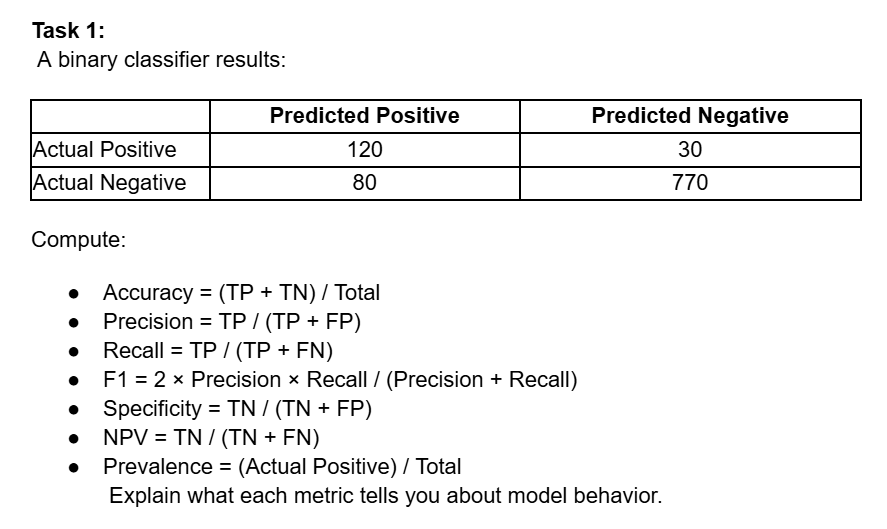

In [37]:
TP, FN, FP, TN = 120, 30, 80, 770
Total = TP + FN + FP + TN

Accuracy = (TP + TN) / Total
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = 2 * (Precision * Recall) / (Precision + Recall)
Specificity = TN / (TN + FP)
NPV = TN / (TN + FN)
Prevalence = (TP + FN) / Total

print(f"\nConfusion Matrix:")
print(f"{'':20} {'Pred Pos':>15} {'Pred Neg':>15}")
print(f"{'Actual Pos':<20} {TP:>15} {FN:>15}")
print(f"{'Actual Neg':<20} {FP:>15} {TN:>15}")

print(f"\nPerformance Metrics:")
print(f"  Accuracy: {Accuracy:.4f} ({Accuracy*100:.1f}%)")
print(f"  Precision:  {Precision:.4f} ({Precision*100:.1f}%)")
print(f"  Recall: {Recall:.4f} ({Recall*100:.1f}%)")
print(f"  F1 Score: {F1:.4f} ({F1*100:.1f}%)")
print(f"  Specificity:  {Specificity:.4f} ({Specificity*100:.1f}%)")
print(f"  NPV:  {NPV:.4f} ({NPV*100:.1f}%)")
print(f"  Prevalence: {Prevalence:.4f} ({Prevalence*100:.1f}%)")



Confusion Matrix:
                            Pred Pos        Pred Neg
Actual Pos                       120              30
Actual Neg                        80             770

Performance Metrics:
  Accuracy: 0.8900 (89.0%)
  Precision:  0.6000 (60.0%)
  Recall: 0.8000 (80.0%)
  F1 Score: 0.6857 (68.6%)
  Specificity:  0.9059 (90.6%)
  NPV:  0.9625 (96.2%)
  Prevalence: 0.1500 (15.0%)


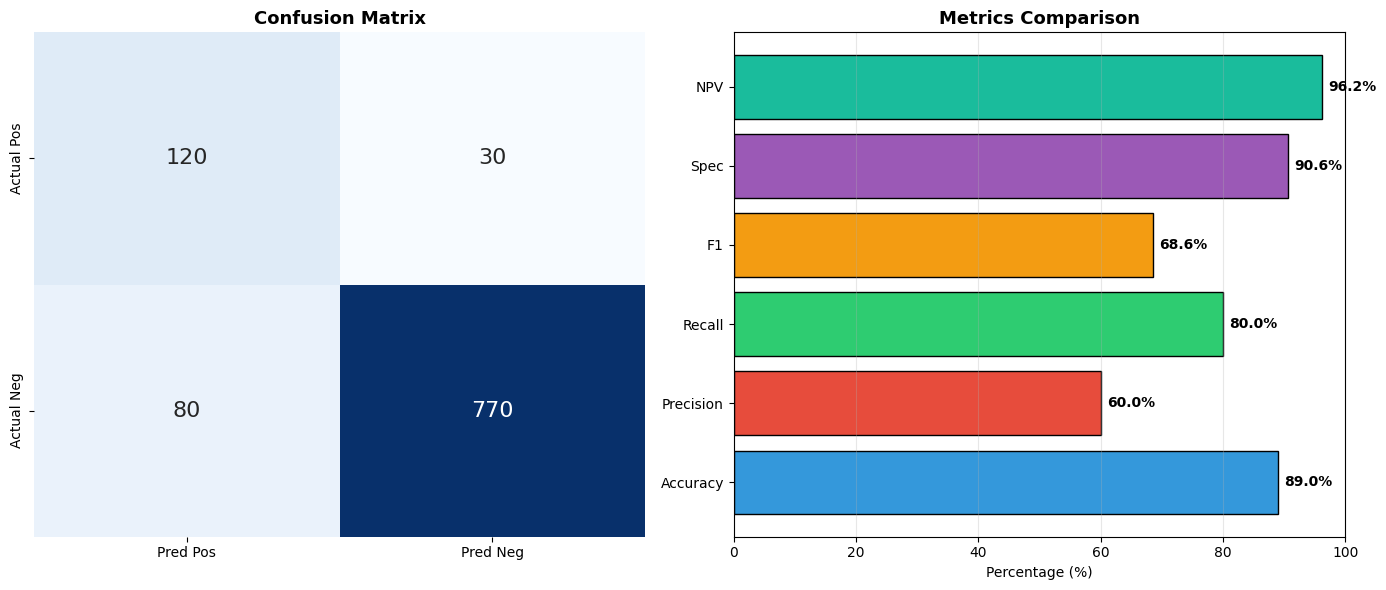

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cm = np.array([[TP, FN], [FP, TN]])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred Pos', 'Pred Neg'],
            yticklabels=['Actual Pos', 'Actual Neg'],
            ax=axes[0], annot_kws={'size': 16})
axes[0].set_title('Confusion Matrix', fontsize=13, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'Spec', 'NPV']
values = [Accuracy*100, Precision*100, Recall*100, F1*100, Specificity*100, NPV*100]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

axes[1].barh(metrics, values, color=colors, edgecolor='black')
axes[1].set_xlabel('Percentage (%)')
axes[1].set_title('Metrics Comparison', fontsize=13, fontweight='bold')
axes[1].set_xlim(0, 100)
for i, v in enumerate(values):
    axes[1].text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Task 2:

A dataset of 10000 samples has only 2 % positives. The model predicts everything as negative.
- Write the confusion matrix.
- Compute Accuracy, Precision, Recall, F1, Specificity.
- Why is Accuracy misleading in this case?
- Which metric would be more appropriate for imbalanced data and why?


In [39]:
total = 10000                # total examples
actual_positive = 200        # number of actual positive instances (2%)
actual_negative = total - actual_positive  # number of actual negative instances (98%)

# Model predicts everything as negative -> confusion matrix components:
TP = 0                       # true positives (predicted positive & actual positive)
FN = actual_positive         # false negatives (predicted negative but actual positive)
FP = 0                       # false positives (predicted positive but actual negative)
TN = actual_negative         # true negatives (predicted negative & actual negative)

accuracy = (TP + TN) / total

# Precision = TP / (TP + FP) -> undefined if TP+FP == 0
precision_den = TP + FP
precision = None if precision_den == 0 else TP / precision_den

# Recall (sensitivity) = TP / (TP + FN) -> 0 here (TP==0)
recall_den = TP + FN
recall = None if recall_den == 0 else TP / recall_den

# F1 score (harmonic mean of precision & recall) -> handle undefined/zero
if precision is None or recall is None or (precision == 0 and recall == 0):
    f1 = 0.0
else:
    f1 = 2 * (precision * recall) / (precision + recall)

# Specificity = TN / (TN + FP)
specificity_den = TN + FP
specificity = None if specificity_den == 0 else TN / specificity_den

print(f"Total: {total:,}, Positive: {actual_positive} ({actual_positive/total:.0%}), "
      f"Negative: {actual_negative:,} ({actual_negative/total:.0%})")
print("Model predicts EVERYTHING as negative\n")

print("Metrics:")
print(f"  Accuracy:    {accuracy:.4f} ({accuracy*100:.0f}%) -- high but misleading for imbalance")
if precision is None:
    print("  Precision:   undefined (no predicted positives)")
else:
    print(f"  Precision:   {precision:.4f}")
if recall is None:
    print("  Recall:      undefined")
else:
    print(f"  Recall:      {recall:.4f} ({recall*100:.0f}%)")
print(f"  F1 Score:    {f1:.4f}")
if specificity is None:
    print("  Specificity: undefined")
else:
    print(f"  Specificity: {specificity:.4f} ({specificity*100:.0f}%)")

print("\nWhy accuracy is misleading:")
print("  - 98% accuracy looks good, but the model always predicts the majority class.")
print("  - It identifies 0 positives (recall = 0), so it's useless for finding positive cases.")
print("  - Use metrics robust to class imbalance: F1, recall, Precision-Recall AUC, MCC, and confusion matrix.")

Total: 10,000, Positive: 200 (2%), Negative: 9,800 (98%)
Model predicts EVERYTHING as negative

Metrics:
  Accuracy:    0.9800 (98%) -- high but misleading for imbalance
  Precision:   undefined (no predicted positives)
  Recall:      0.0000 (0%)
  F1 Score:    0.0000
  Specificity: 1.0000 (100%)

Why accuracy is misleading:
  - 98% accuracy looks good, but the model always predicts the majority class.
  - It identifies 0 positives (recall = 0), so it's useless for finding positive cases.
  - Use metrics robust to class imbalance: F1, recall, Precision-Recall AUC, MCC, and confusion matrix.


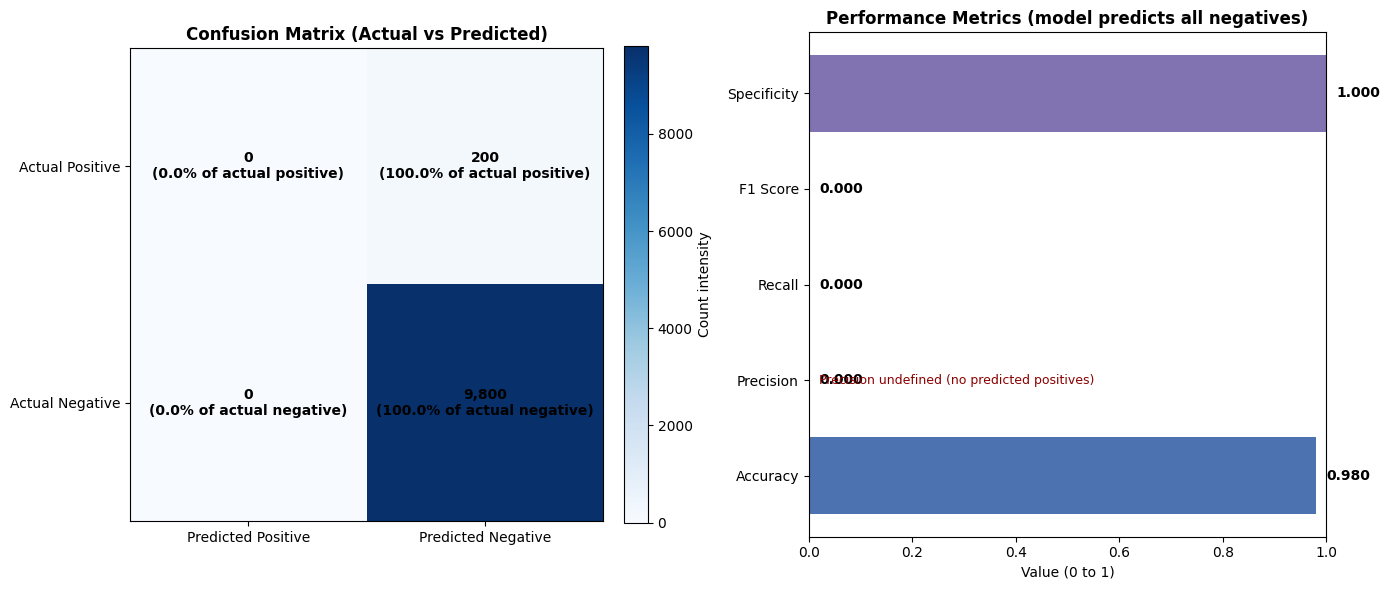

In [40]:
conf_mat = np.array([[TP, FN],
                     [FP, TN]], dtype=float)

# Row sums for computing row-wise percentages (Actual-positive row, Actual-negative row)
row_sums = conf_mat.sum(axis=1, keepdims=True)
# Avoid division by zero
row_pct = np.divide(conf_mat, row_sums, out=np.zeros_like(conf_mat), where=(row_sums != 0))

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']
metric_values = [
    accuracy,
    0.0 if precision is None else precision,    # show 0.0 in the chart for undefined precision
    0.0 if recall is None else recall,
    f1,
    0.0 if specificity is None else specificity
]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Left: Confusion matrix heatmap ----
ax = axes[0]
cmap = plt.cm.Blues
im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)

# Axis labels and ticks
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted Positive', 'Predicted Negative'], fontsize=10)
ax.set_yticklabels(['Actual Positive', 'Actual Negative'], fontsize=10)
ax.set_title('Confusion Matrix (Actual vs Predicted)', fontsize=12, fontweight='bold')

# Annotate each cell with count and row-wise percentage
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        count = int(conf_mat[i, j])
        pct = row_pct[i, j]
        if row_sums[i, 0] == 0:
            annotation = f"{count:,}\n(---)"
        else:
            annotation = f"{count:,}\n({pct:.1%} of actual {'positive' if i == 0 else 'negative'})"
        ax.text(j, i, annotation, ha='center', va='center', color='black', fontsize=10, fontweight='bold')

# Colorbar for intensity
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Count intensity')

# ---- Right: Horizontal bar chart of metrics ----
ax2 = axes[1]
bars = ax2.barh(metric_names, metric_values, color=['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b2'])
ax2.set_xlim(0, 1)
ax2.set_xlabel('Value (0 to 1)')
ax2.set_title('Performance Metrics (model predicts all negatives)', fontsize=12, fontweight='bold')

# Annotate the bar values
for i, v in enumerate(metric_values):
    ax2.text(v + 0.02, i, f"{v:.3f}", va='center', fontweight='bold')

# If precision is undefined, add a small explanatory note
if precision is None:
    ax2.text(0.02, 1, "Precision undefined (no predicted positives)", color='darkred', fontsize=9, va='center')

# Improve layout and show
plt.tight_layout()
plt.show()

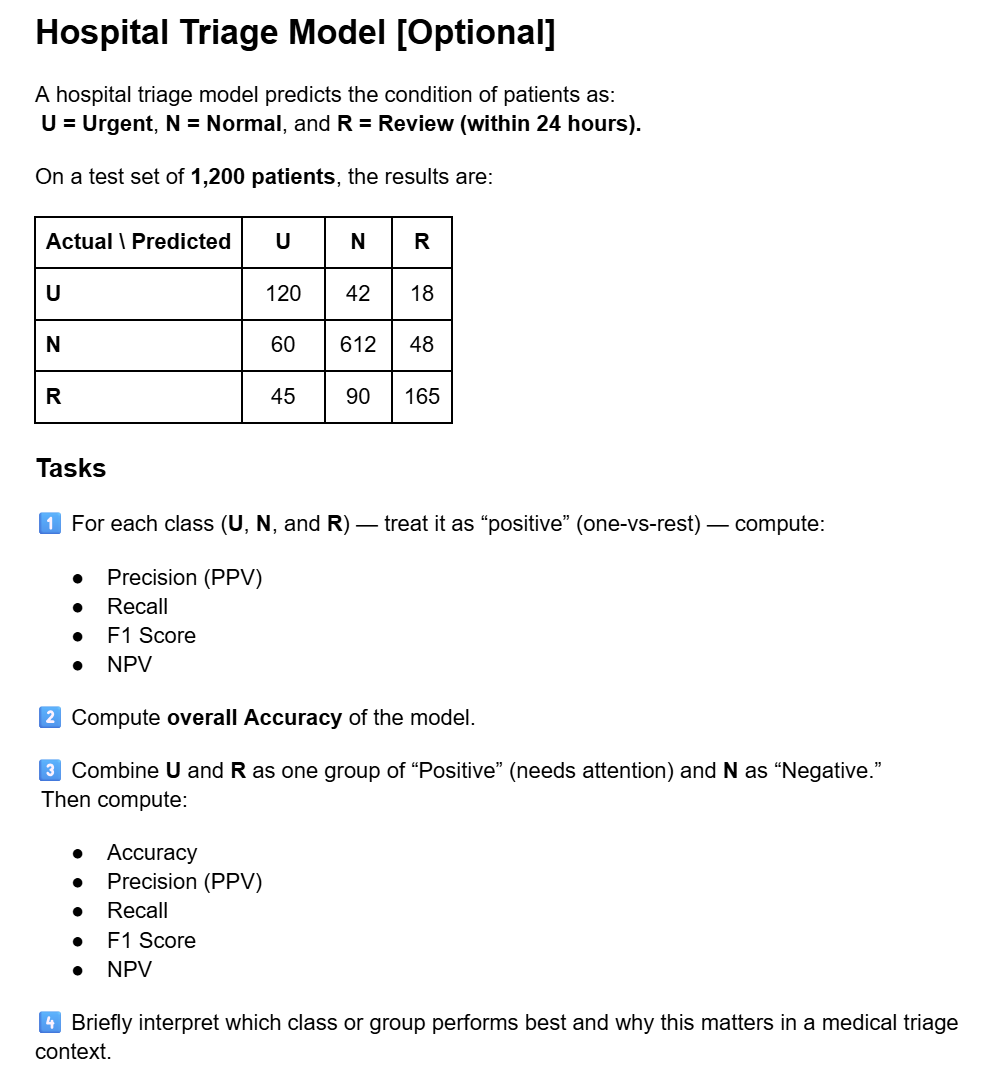

In [41]:
cm_triage = np.array([
    [120,  42,  18],  # U (Urgent)
    [ 60, 612,  48],  # N (Normal)
    [ 45,  90, 165]   # R (Review)
])

total_triage = cm_triage.sum()

print(f"\nTotal patients: {total_triage:,}")
print(f"\nConfusion Matrix:")
print(f"{'Actual \\ Pred':<15} {'U':>10} {'N':>10} {'R':>10} {'Total':>10}")
print("-" * 60)
for i, cls in enumerate(['U', 'N', 'R']):
    row_sum = cm_triage[i].sum()
    print(f"{cls:<15} {cm_triage[i,0]:>10} {cm_triage[i,1]:>10} {cm_triage[i,2]:>10} {row_sum:>10}")

# %% TASK 1: ONE-VS-REST METRICS
print("\n" + "="*70)
print("TASK 1: ONE-VS-REST METRICS")
print("="*70)

def calculate_ovr_metrics(cm, class_idx, class_name):
    TP = cm[class_idx, class_idx]
    FN = cm[class_idx, :].sum() - TP
    FP = cm[:, class_idx].sum() - TP
    TN = cm.sum() - TP - FN - FP

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    npv = TN / (TN + FN) if (TN + FN) > 0 else 0

    return {'class': class_name, 'Precision': precision, 'Recall': recall, 'F1': f1, 'NPV': npv}

results_ovr = [calculate_ovr_metrics(cm_triage, i, cls) for i, cls in enumerate(['U', 'N', 'R'])]

print(f"\n{'Class':<10} {'Precision':>12} {'Recall':>12} {'F1':>12} {'NPV':>12}")
print("-" * 60)
for r in results_ovr:
    print(f"{r['class']:<10} {r['Precision']*100:>11.1f}% {r['Recall']*100:>11.1f}% {r['F1']*100:>11.1f}% {r['NPV']*100:>11.1f}%")

# %% TASK 2: OVERALL ACCURACY
correct = cm_triage[0,0] + cm_triage[1,1] + cm_triage[2,2]
overall_accuracy = correct / total_triage

print(f"\nOverall Accuracy = {correct}/{total_triage} = {overall_accuracy:.4f} ({overall_accuracy*100:.1f}%)")

# %% TASK 3: BINARY GROUPING
TP_bin = cm_triage[0,0] + cm_triage[0,2] + cm_triage[2,0] + cm_triage[2,2]
FN_bin = cm_triage[0,1] + cm_triage[2,1]
FP_bin = cm_triage[1,0] + cm_triage[1,2]
TN_bin = cm_triage[1,1]

acc_bin = (TP_bin + TN_bin) / total_triage
prec_bin = TP_bin / (TP_bin + FP_bin)
rec_bin = TP_bin / (TP_bin + FN_bin)
f1_bin = 2 * prec_bin * rec_bin / (prec_bin + rec_bin)
npv_bin = TN_bin / (TN_bin + FN_bin)

print("\n" + "="*70)
print("TASK 3: BINARY GROUPING (U+R vs N)")
print("="*70)
print(f"\nBinary Metrics:")
print(f"  Accuracy:  {acc_bin:.4f} ({acc_bin*100:.1f}%)")
print(f"  Precision: {prec_bin:.4f} ({prec_bin*100:.1f}%)")
print(f"  Recall:    {rec_bin:.4f} ({rec_bin*100:.1f}%)")
print(f"  F1:        {f1_bin:.4f} ({f1_bin*100:.1f}%)")
print(f"  NPV:       {npv_bin:.4f} ({npv_bin*100:.1f}%)")

# %% TASK 4: CLINICAL INTERPRETATION
print("\n" + "="*70)
print("TASK 4: CLINICAL INTERPRETATION")
print("="*70)

print("\nPERFORMANCE RANKING:")
print("  1. Normal (N):  F1 = 83.6% ⭐ BEST")
print("  2. Review (R):  F1 = 62.1%")
print("  3. Urgent (U):  F1 = 59.3%")

print("\nCRITICAL SAFETY ISSUES:")
print("  • Urgent recall only 66.7% - misses 1 in 3 urgent patients!")
print("  • Review recall only 55% - misses 45% of deteriorating patients!")
print("  • Urgent precision only 53% - half of 'urgent' flags are false")

print("\nRECOMMENDATIONS:")
print("  1. Lower thresholds for U and R (prioritize recall over precision)")
print("  2. Two-stage triage: AI separates N from (U+R), humans split U/R")
print("  3. Add features for subtle deterioration signs")
print("  4. Mandatory human review of all 'Normal' predictions")
print("  5. In healthcare: err on side of caution - better to over-triage!")



Total patients: 1,200

Confusion Matrix:
Actual \ Pred            U          N          R      Total
------------------------------------------------------------
U                      120         42         18        180
N                       60        612         48        720
R                       45         90        165        300

TASK 1: ONE-VS-REST METRICS

Class         Precision       Recall           F1          NPV
------------------------------------------------------------
U                 53.3%        66.7%        59.3%        93.8%
N                 82.3%        85.0%        83.6%        76.3%
R                 71.4%        55.0%        62.1%        86.1%

Overall Accuracy = 897/1200 = 0.7475 (74.8%)

TASK 3: BINARY GROUPING (U+R vs N)

Binary Metrics:
  Accuracy:  0.8000 (80.0%)
  Precision: 0.7632 (76.3%)
  Recall:    0.7250 (72.5%)
  F1:        0.7436 (74.4%)
  NPV:       0.8226 (82.3%)

TASK 4: CLINICAL INTERPRETATION

PERFORMANCE RANKING:
  1. Normal (N):  F1

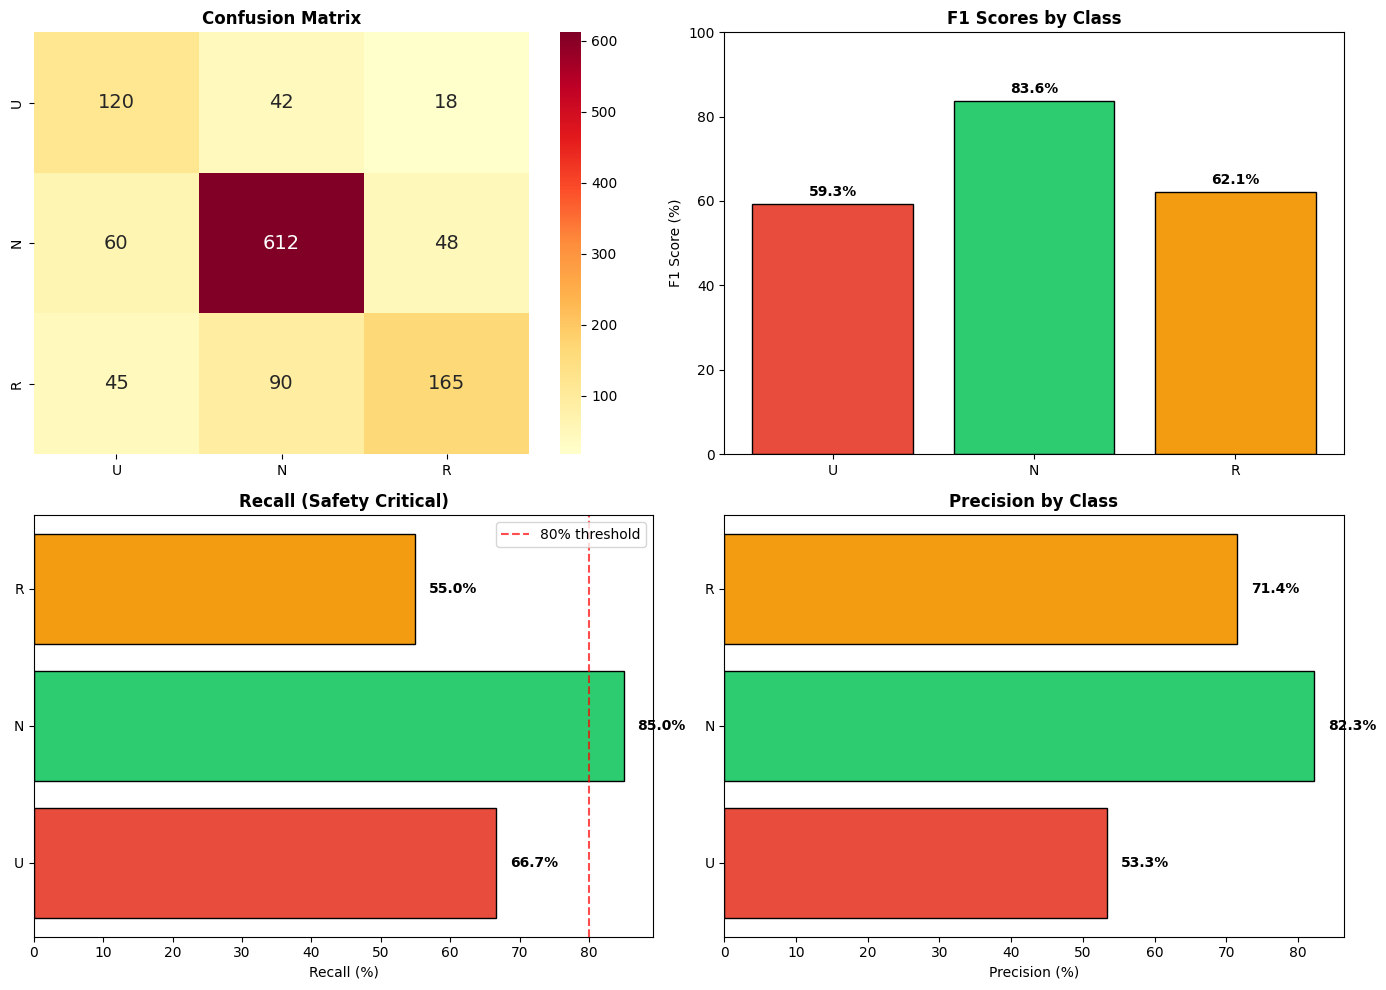

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Confusion matrix heatmap
sns.heatmap(cm_triage, annot=True, fmt='d', cmap='YlOrRd', cbar=True,
            xticklabels=['U', 'N', 'R'], yticklabels=['U', 'N', 'R'],
            ax=axes[0,0], annot_kws={'size': 14})
axes[0,0].set_title('Confusion Matrix', fontweight='bold')

# F1 scores
f1_scores = [r['F1']*100 for r in results_ovr]
axes[0,1].bar(['U', 'N', 'R'], f1_scores, color=['#e74c3c', '#2ecc71', '#f39c12'], edgecolor='black')
axes[0,1].set_ylabel('F1 Score (%)')
axes[0,1].set_title('F1 Scores by Class', fontweight='bold')
axes[0,1].set_ylim(0, 100)
for i, v in enumerate(f1_scores):
    axes[0,1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Recall comparison (safety critical)
recalls = [r['Recall']*100 for r in results_ovr]
axes[1,0].barh(['U', 'N', 'R'], recalls, color=['#e74c3c', '#2ecc71', '#f39c12'], edgecolor='black')
axes[1,0].axvline(80, color='red', linestyle='--', alpha=0.7, label='80% threshold')
axes[1,0].set_xlabel('Recall (%)')
axes[1,0].set_title('Recall (Safety Critical)', fontweight='bold')
axes[1,0].legend()
for i, v in enumerate(recalls):
    axes[1,0].text(v + 2, i, f'{v:.1f}%', va='center', fontweight='bold')

# Precision comparison
precisions = [r['Precision']*100 for r in results_ovr]
axes[1,1].barh(['U', 'N', 'R'], precisions, color=['#e74c3c', '#2ecc71', '#f39c12'], edgecolor='black')
axes[1,1].set_xlabel('Precision (%)')
axes[1,1].set_title('Precision by Class', fontweight='bold')
for i, v in enumerate(precisions):
    axes[1,1].text(v + 2, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()